In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Notebooks/Semestre2/DB/Advertising.csv')
display(df)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


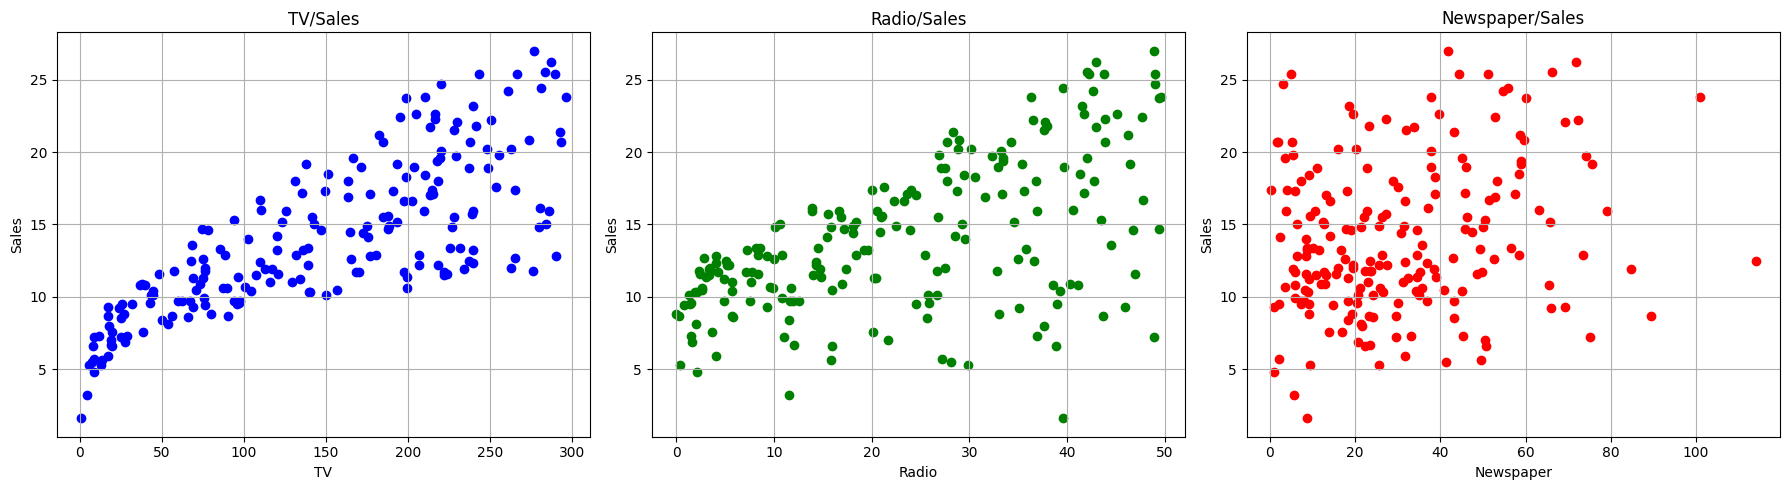

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# TV
axs[0].scatter(df['TV'], df['Sales'], color='blue')
axs[0].set_title('TV/Sales')
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')
axs[0].grid(True)

# Radio
axs[1].scatter(df['Radio'], df['Sales'], color='green')
axs[1].set_title('Radio/Sales')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')
axs[1].grid(True)

# Newspaper
axs[2].scatter(df['Newspaper'], df['Sales'], color='red')
axs[2].set_title('Newspaper/Sales')
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Calculo Covarianza

In [4]:
import numpy as np

def covarianza(x,y):
    n = len(x) #200
    x_prom = np.mean(x)
    y_prom = np.mean(y)
    print(f"Valores:{n}, X_promedio:{x_prom},Y_promedio{y_prom}")
    suma = 0
    for i in range(n):
        suma += (x[i] - x_prom) * (y[i] - y_prom)
    total = suma / (n-1)
    return total

In [5]:
tv_cv = covarianza(df['TV'], df['Sales'])
radio_cv = covarianza(df['Radio'], df['Sales'])
newspaper_cv = covarianza(df['Newspaper'], df['Sales'])

print(f'TV/Sales: {tv_cv}')
print(f'Radio/Sales: {radio_cv}')
print(f'Newspaper/Sales: {newspaper_cv}')

Valores:200, X_promedio:147.0425,Y_promedio14.0225
Valores:200, X_promedio:23.264000000000006,Y_promedio14.0225
Valores:200, X_promedio:30.553999999999995,Y_promedio14.0225
TV/Sales: 350.390194723618
Radio/Sales: 44.63568844221103
Newspaper/Sales: 25.94139195979899


# Matriz Covarianza

In [6]:
cols = ["TV", "Radio", "Newspaper", "Sales"]
n = len(df)
cov_matrix = np.zeros((len(cols), len(cols)))

In [7]:
for i in range(len(cols)):
    for j in range(len(cols)):
        x = df[cols[i]].values
        y = df[cols[j]].values
        cov_matrix[i, j] = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (n - 1)

print(cov_matrix)

[[7370.94989322   69.86249246  105.91945226  350.39019472]
 [  69.86249246  220.42774271  114.49697889   44.63568844]
 [ 105.91945226  114.49697889  474.30832563   25.94139196]
 [ 350.39019472   44.63568844   25.94139196   27.22185302]]


In [8]:
std_devs = np.std(df[cols].values, axis=0, ddof=1)
corr_matrix = cov_matrix / np.outer(std_devs, std_devs)

print(corr_matrix)

[[1.         0.05480866 0.05664787 0.78222442]
 [0.05480866 1.         0.35410375 0.57622257]
 [0.05664787 0.35410375 1.         0.22829903]
 [0.78222442 0.57622257 0.22829903 1.        ]]


In [9]:
df1 = df[["TV", "Radio", "Newspaper", "Sales"]]
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [19]:
def regresion_lineal(data, x, y):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(data[x], data[y], color='blue')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    emc = {}
    for a in np.arange(0.0, 0.2, 0.001):
      for b in np.arange(0.0, 10.0, 0.05):
            y_pred = a * data[x] + b
            EMC = np.mean((data[y] - y_pred)**2)
            emc[(a, b)] = EMC

    a, b = min(emc, key=emc.get)
    y_pred = a * data[x] + b


    # EMC
    EMC = np.mean((data[y] - y_pred)**2)

    ax.plot(data[x], y_pred, color='red', label=f'a={a}, b={b} (ECM={EMC})')

    ax.legend()
    plt.show()

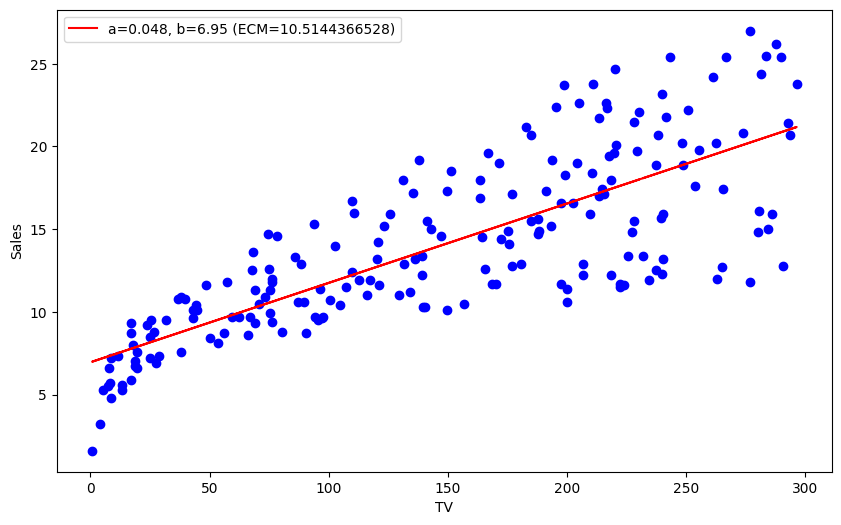

In [20]:
regresion_lineal(df, 'TV', 'Sales')